# Курсовая работа. Блок 1

<br><br>
**Описание работы:**

Перед вами стоит бизнес-задача – на основании имеющихся данных подготовить аналитический отчет, который в дальнейшем поможет продюсерам образовательных программ эффективно выстраивать стратегию по модернизированию и улучшению курсов. В начале отчета предлагается оформить емкий описательный блок по каждому курсу на основании рассчитанных показателей. Далее предлагается посчитать потенциальную нагрузку на преподавателей, чтобы оценить необходимость расширения штата сотрудников. Затем идет блок из двух пунктов по анализу качества контента курсов, где необходимо выявить проблемные модули, которые, возможно, требуют доработки. Также стоит задача выявить потенциальную сезонность. Каждый из пунктов анализа предполагается сопроводить аналитическим выводом на основании рассчитанных метрик.

<br><br>
[Codebook](#Codebook) <br>
[1. Описание и начальная работа с данными](#1.1-Описание-и-начальная-работа-с-данными)<br>
[2. Расчет потенциальной нагрузки на преподавателей](#2.-Расчет-потенциальной-нагрузки-на-преподавателей)<br>
[3. Выявление проблемных модулей](#3.-Выявление-проблемных-модулей)<br>
[4. Расчет конверсии](#4.-Расчет-конверсии) <br>

## Codebook

`courses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `title` – название курса <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `field` – сфера, к которой относится курс <br> <br><br>
`students.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp; `city` – город студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `birthday` – день рождения студента <br> <br><br>
`course_contents.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `course_id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `module_title` – название модуля <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_title` – название урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_token` – токен урока <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `is_video` – наличие видео *(true/false)* <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `is_homework` – наличие домашней работы *(true/false)* <br>
<br><br>
`progresses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `student_id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `course_id` – идентификатор курса <br> <br><br>
`progress_phases.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `progress_id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `status` – статус прохождения урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `start_date` – дата начала <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `finish_date` – дата окончания <br>
<br><br>

## 1. Описание и начальная работа с данными

Вам необходимо подготовить данные и описать их. Данные реальные и содержат пропущенные значения, а также лишние относительно друг друга данные. <br>

Объедините датасеты (кроме `students.scv`) в один общий для дальнейшей работы. Отдельный датасет создайте для расчета среднего возраста студентов курсов (отдельный датасет со `students.scv` нужен, чтобы в основном не потерять значения в основном датасете из-за того, что не по всем студентам есть анкетные данные о дате рождения). <br> <br>
Опишите данные: <br>
1. Посчитайте
      * общее количество курсов в датасете, 
      * количество модулей на каждом курсе, 
      * количество уроков в каждом модуле на каждом курсе, 
      * медианное количество уроков в модуле на каждом курсе, 
      * количество учеников на каждом курсе
      * минимальный, максимальный, средний, медианный возраст студентов
      * минимальный, максимальный, средний, медианный возраст студентов на каждом курсе
2. Постройте bar-chart, отражающий количество студентов на каждом курсе. Ticks нужно развернуть так, чтобы они были читаемы
3. Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий количество студентов на каждом курсе. График должен иметь заголовок. Значения должны быть отсортированы. Цвет столбцов должен содержать информацию о сфере, к которой относится курс (то есть нужна легенда). Прозрачность должна стоять на отметке 0.1. На график должна быть нанесена линия медианы. У медианы должен быть свой цвет. Рамки у графика быть не должно 
4.     На основании рассчитанных значений опишите данные (описание должно быть полным и покрывать все полученные выше метрики)

_____________________________________________________________________


Для того, чтобы проверить, что вы правильно соединили все датасеты в основной (без `students.csv`), запустите аналогичный приведенному ниже запрос. Выдача должна совпадать. Имейте в виду, что названия некоторых столбцов были переименованы.

In [2]:
from matplotlib.dates import DateFormatter
from datetime import date, timedelta
import seaborn as sns
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

# plt.rcdefaults()
# Загружаем данные из файлов
courses = pd.read_csv(r'data\courses.csv')
course_contents = pd.read_csv(r'data\course_contents.csv')
progresses = pd.read_csv(r'data\progresses.csv')
progress_phases = pd.read_csv(r'data\progress_phases.csv')
students = pd.read_csv(r'data\students.csv')
# Удаляем лишнюю колонку
courses.drop('Unnamed: 0', axis='columns', inplace=True)
# Переименовываем колонки в таблице courses
courses.columns = ["course_id", "course_title", "field"]
# Соединяем таблицы courses и course_contents
mer_cors = pd.merge(left=courses,
                    right=course_contents,
                    on="course_id",
                    how='inner')
# Переименовываем колонки в таблице progresses
progresses.columns = ["progress_id", 'student_id', "course_id"]
# Соединяем таблицы prorgress_phases и progresses
mer_prog = pd.merge(left=progress_phases,
                    right=progresses,
                    on="progress_id",
                    how='inner')
# Соединяем результирующие таблицы в одну
mer_main = pd.merge(left=mer_prog,
                    right=mer_cors,
                    on=["course_id", 'module_number', 'lesson_number'],
                    how='inner')

In [2]:
def get_age(birthday
            ):  # Функция для вычисления возраста (в годах) от даты рождения
    today = datetime.datetime.now()
    age = today.year - birthday.year
    if (age > 70) | (age < 16):
        return None
    else:
        if today.month < birthday.month:
            age -= 1
        elif today.month == birthday.month and today.day < birthday.day:
            age -= 1
        return age

In [3]:
# Отбираем уникальные значения из нужной колонки таблицы
print('Общее количество курсов в датасете:',
      mer_main['course_id'].unique().size)

Общее количество курсов в датасете: 15


In [4]:
# Группируем таблицу по курсам и находим максимальный номер модуля - получаем количество модулей в курсе
modules = mer_main.groupby(['course_title'
                            ])['module_number'].max().reset_index()
modules.columns = ['Название курса', 'Количество модулей в курсе']
modules

,Название курса,Количество модулей в курсе
0,Excel Базовый,9
1,Java-разработчик,17
2,Java-разработчик c нуля,9
3,JavaScript с нуля,18
4,PHP-разработчик с 0 до PRO. Часть 1,8
5,SMM-маркетолог от А до Я,11
6,UX-дизайн,20
7,Анимация интерфейсов,21
8,Веб-вёрстка для начинающих 2.0,8
9,Веб-дизайн PRO 2.0,17


In [5]:
# Группируем таблицу по модулям и находим максимальный номер урока - получаем количество уроков в модуле
lessons = mer_main.groupby(['course_title', 'module_title'
                            ])['lesson_number'].max().reset_index()
lessons.columns = ['Курс', 'Модуль', 'Количество уроков в модуле']
lessons

,Курс,Модуль,Количество уроков в модуле
0,Excel Базовый,Визуализация данных Excel,5
1,Excel Базовый,Основной функционал Excel,11
2,Excel Базовый,Основной функционал Excel (продолжение),7
3,Excel Базовый,Сводные таблицы Excel,5
4,Excel Базовый,Формулы и функции Excel. Более сложные формулы,5
...,...,...,...
224,Руководитель digital-проектов,Решение факапов. Lean/TOC. Обзор.,5
225,Руководитель digital-проектов,Требовательность digital-продюсера,4
226,Руководитель digital-проектов,Управление временем,4
227,Руководитель digital-проектов,Управление дизайнерами. Разработка дизайна по ...,7


In [6]:
# Группируем предыдущую таблицу по курсам, и находим медиану
lessons = lessons.groupby(['Курс']).median().reset_index()
lessons.columns = [
    'Название курса', 'Медианное значение количества уроков в модуле'
]
lessons

,Название курса,Медианное значение количества уроков в модуле
0,Excel Базовый,5.0
1,Java-разработчик,7.0
2,Java-разработчик c нуля,13.0
3,JavaScript с нуля,7.0
4,PHP-разработчик с 0 до PRO. Часть 1,4.0
5,SMM-маркетолог от А до Я,6.0
6,UX-дизайн,3.5
7,Анимация интерфейсов,3.0
8,Веб-вёрстка для начинающих 2.0,7.0
9,Веб-дизайн PRO 2.0,5.0


In [7]:
students_on_courses = mer_main.groupby('course_title').agg({
    'student_id':
    'unique'
}).applymap(lambda x: x.size).sort_values('student_id', ascending=True)

# Группируем по курсам, находим уникальные id студентов и считаем их, сортируем по возрастанию
students_on_courses = students_on_courses.reset_index().rename(
    columns={
        'course_title': 'Название курса',
        'student_id': 'Количество студентов на курсе'
    })
students_on_courses

,Название курса,Количество студентов на курсе
0,SMM-маркетолог от А до Я,506
1,Веб-дизайн Базовый,518
2,Java-разработчик c нуля,581
3,Анимация интерфейсов,598
4,Веб-разработчик,628
5,Руководитель digital-проектов,685
6,Java-разработчик,763
7,Excel Базовый,782
8,PHP-разработчик с 0 до PRO. Часть 1,854
9,JavaScript с нуля,966


In [8]:
# Меняем тип колонки, отбираем только результаты с корректно заполненной датой рождения,
students_age = students.copy()
# Удаляем лишние поля
students_age.drop('id_', axis='columns', inplace=True) 
students_age['birthday'] = pd.to_datetime(students_age['birthday'],
                                          errors='coerce')
students_age = students_age.dropna(subset=['birthday'])
# Пользуясь написанной ранее функцией, создаем новую колонку с возрастом
students_age['age'] = students_age['birthday'].agg(get_age)
# Переименовываем колонку, содержащую id
students_age.columns = ['student_id', 'city', 'birthday', 'age']
print('Статистические показатели возраста')
round(students_age.describe(),2)

Статистические показатели возраста


,age
count,25302.00
mean,30.42
std,7.45
min,15.00
25%,25.00
50%,30.00
75%,35.00
max,70.00


In [9]:
# Присооединяем таблицу с возрастами к основной
students_age_on_courses = pd.merge(left=students_age,
                                   right=mer_main,
                                   on='student_id',
                                   how='inner')

# Группируем полученную таблицу по курсам, выводим столбец 'age' через метод .describe
students_age_on_courses.groupby(['course_title'])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
course_title,,,,,,,,
Excel Базовый,17162.0,34.363361,6.971635,17.0,29.0,34.0,39.0,62.0
Java-разработчик,22716.0,30.868419,7.864239,15.0,25.0,30.0,35.0,65.0
Java-разработчик c нуля,14277.0,31.122435,7.463585,15.0,26.0,30.0,35.0,56.0
JavaScript с нуля,19326.0,29.758046,6.792693,16.0,25.0,29.0,34.0,60.0
PHP-разработчик с 0 до PRO. Часть 1,5802.0,31.961393,7.598838,16.0,27.0,31.0,36.0,67.0
SMM-маркетолог от А до Я,7627.0,30.055199,6.041010,18.0,26.0,29.0,34.0,53.0
UX-дизайн,20899.0,31.434327,5.620425,16.0,27.0,31.0,35.0,59.0
Анимация интерфейсов,5460.0,30.981319,5.497457,16.0,27.0,30.0,34.0,52.0
Веб-вёрстка для начинающих 2.0,28910.0,29.872743,6.917837,16.0,25.0,29.0,34.0,60.0


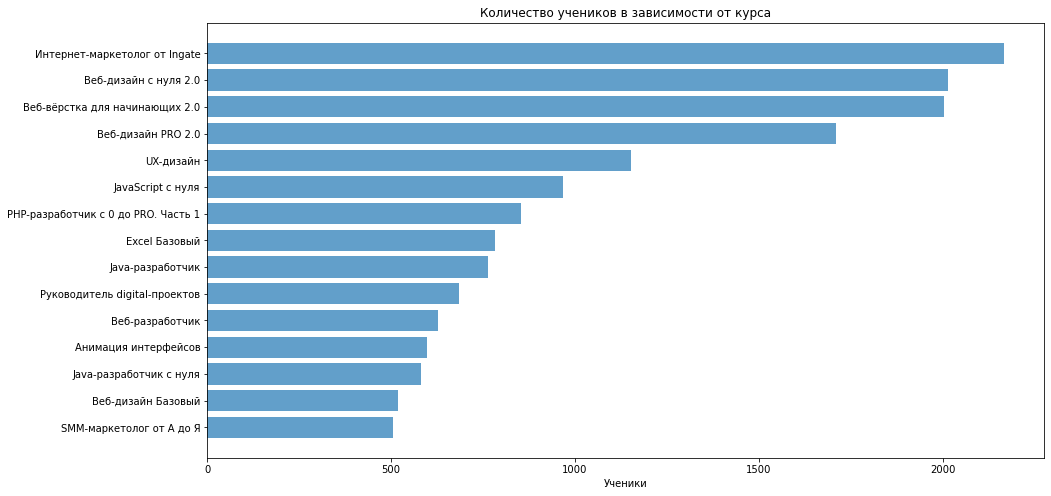

In [10]:
plt.figure(figsize=(15, 8))
# Отбираем названия курсов
courses_list = students_on_courses['Название курса'].unique()
plt.barh(
    courses_list,
    students_on_courses['Количество студентов на курсе'],
    align='center',
    alpha=0.7,
)
plt.xlabel('Ученики')
# Устанавливаем заголовок и подпись оси x
plt.title('Количество учеников в зависимости от курса')
plt.show()

In [11]:
students_on_courses1 = mer_main.groupby(['course_title', 'field']).agg({
    'student_id':
    'unique'
}).applymap(lambda x: x.size).sort_values('student_id', ascending=True)
students_on_courses1 = students_on_courses1.loc[:, 'student_id'].unstack()
students_on_courses1

field,Business,Design,Development,Marketing
course_title,,,,
Excel Базовый,782.0,NaN,NaN,NaN
Java-разработчик,NaN,NaN,763.0,NaN
Java-разработчик c нуля,NaN,NaN,581.0,NaN
JavaScript с нуля,NaN,NaN,966.0,NaN
PHP-разработчик с 0 до PRO. Часть 1,NaN,NaN,854.0,NaN
SMM-маркетолог от А до Я,NaN,NaN,NaN,506.0
UX-дизайн,NaN,1151.0,NaN,NaN
Анимация интерфейсов,NaN,598.0,NaN,NaN
Веб-вёрстка для начинающих 2.0,NaN,NaN,2004.0,NaN


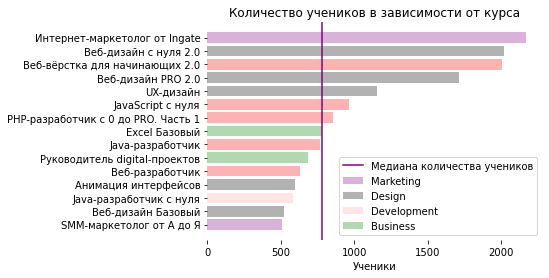

In [12]:
# Задаем размеры графикаplt.figure(figsize=(15, 8))  
b, des, dev, mark = [True for _ in range(4)]
# Проходимся в цикле for и рисуем построчно график
for i in courses_list:  
    coursec = students_on_courses1.loc[i]
    coursec = coursec.fillna(0)
    if coursec['Business'] != 0:
        if b:
            plt.barh(i,
                     coursec['Business'],
                     align='center',
                     color='g',
                     alpha=0.3,
                     label='Business')
            b = False
        else:
            plt.barh(i,
                     coursec['Business'],
                     align='center',
                     color='g',
                     alpha=0.3)
    elif coursec['Design'] != 0:
        if des:
            plt.barh(i,
                     coursec['Design'],
                     align='center',
                     color='black',
                     alpha=0.3,
                     label='Design')
            des = False
        else:
            plt.barh(i,
                     coursec['Design'],
                     align='center',
                     color='black',
                     alpha=0.3)
    elif coursec['Development'] != 0:
        if dev:
            plt.barh(i,
                     coursec['Development'],
                     align='center',
                     color='red',
                     alpha=0.1,
                     label='Development')
            dev = False
        else:
            plt.barh(i,
                     coursec['Development'],
                     align='center',
                     color='red',
                     alpha=0.3)

    else:
        if mark:
            plt.barh(i,
                     coursec['Marketing'],
                     align='center',
                     color='purple',
                     alpha=0.3,
                     label='Marketing')
            mark = False
        else:
            plt.barh(i,
                     coursec['Marketing'],
                     align='center',
                     color='purple',
                     alpha=0.3)
# Устанавливаем заголовок и подпись оси x
    plt.xlabel('Ученики')
    plt.title('Количество учеников в зависимости от курса')
# Убираем рамки графика
sns.despine(left=True, bottom=True, right=True)
# Отрисовываем медиану количества учеников на курсах
plt.axvline(students_on_courses.median().values,
            courses_list[0],
            courses_list[len(courses_list) - 1],
            color='purple',
            label='Медиана количества учеников')
plt.legend()
plt.show()

Общее

В данном датасете находится информация о 15 курсах, каждый курс делится на модули. Всего в курсах от 8 до 21 модулей, медианное значение - 17. В каждом модуле есть уроки, от 1 до 29, медианное значение - 5.

Студенты

На различных курсах количество студентов находится в диапазоне от 506 до 2168, медианное значение по курсам - 782.
Возраст студентов варьируется от 15 до 70 лет, медианное же значение возраста равняется 29, что незначительно отличается от среднего (~30).

График

По построенному графику можно понять что есть как более так и менее популярные курсы. 
Самым непопулярным является "Java-разработчик". Так же относительно непопулярны курсы: "Веб-разработчик", "Веб-верстка для начинающих 2.0", "Веб-дизайн базовый". Самую большую популярность имеет курс "SMM-маркетолог от А до Я". Средние показатели популярности показывают курсы: "Java-разработчик с нуля", "PHP-разработчик с 0 до PRO. Часть 1", "Веб-дизайн с нуля 2.0".

По данному модулю можно сделать вывод о том, что несмотря на то, что данные по курсам разнятся, средние значения возраста близки к медианным, а значит и отклонение небольшое. Курсы имеют разную популярность, если рассматривать их с точки зрения количества студентов, - показатели самого популярного курса в 4 раза выше, чем у самого непопулярного. Так же можно сказать о том, что курсы имеют разную структуру и объем, как по модулям, так и по урокам.

## 2. Расчет потенциальной нагрузки на преподавателей

1. Рассчитать прирост студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно). Считать дату начала прохождения курса студентом по дате начала первой домашней работы.
2. На основании первого пункта построить line-graph с приростом студентов в каждом месяце для каждого курса. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы.
3. На основании первого пункта построить line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая прирост, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно
4. Рассчитать количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса. Учитывать, что выполнение домашнего задания может перетекать из одного месяца в другой (такие дз надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)
5. Построить line-graph по четвертому пункту. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы
6. Построить один line-graph для всех курсов по четвертому пункту. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая количество прогрессов, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно
7. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

In [13]:
import calendar
# Добавляем новые столбцы с годом и месяцем записи
mer_main['start_date_new'] = mer_main['start_date'].astype('datetime64[M]')
mer_main['finish_date_new'] = mer_main['finish_date'].astype('datetime64[M]')
# Отбираем записи по принадлжености к домашней работе
stud_gai = mer_main[((mer_main['module_number'] == 1)) & (
    (mer_main['is_homework'] == True)
    | (mer_main['lesson_title'] == "Сохранение документов"))].groupby(
        ['course_title', 'start_date_new']).size().reset_index()

stud_gai.set_index('start_date_new', inplace=True)

In [14]:
# Создаем функцию reind, преобразующую датафрейм
def reind(df: pd.DataFrame, courses_list: list, dm: pd.DatetimeIndex):
    rei = df[0:0].copy()
    for course in courses_list:
        m = df[df['course_title'] == course].reindex(dm, fill_value=0).copy()
        m['course_title'] = course
        rei = rei.append(m)
    return rei

In [15]:
# Определяем весь интересующий нас период, применяем функцию reind к датафрейму stud_gai
sm = pd.date_range(start='3/1/2016', periods=41, freq=pd.offsets.MonthBegin())
stud = reind(stud_gai, courses_list, sm)

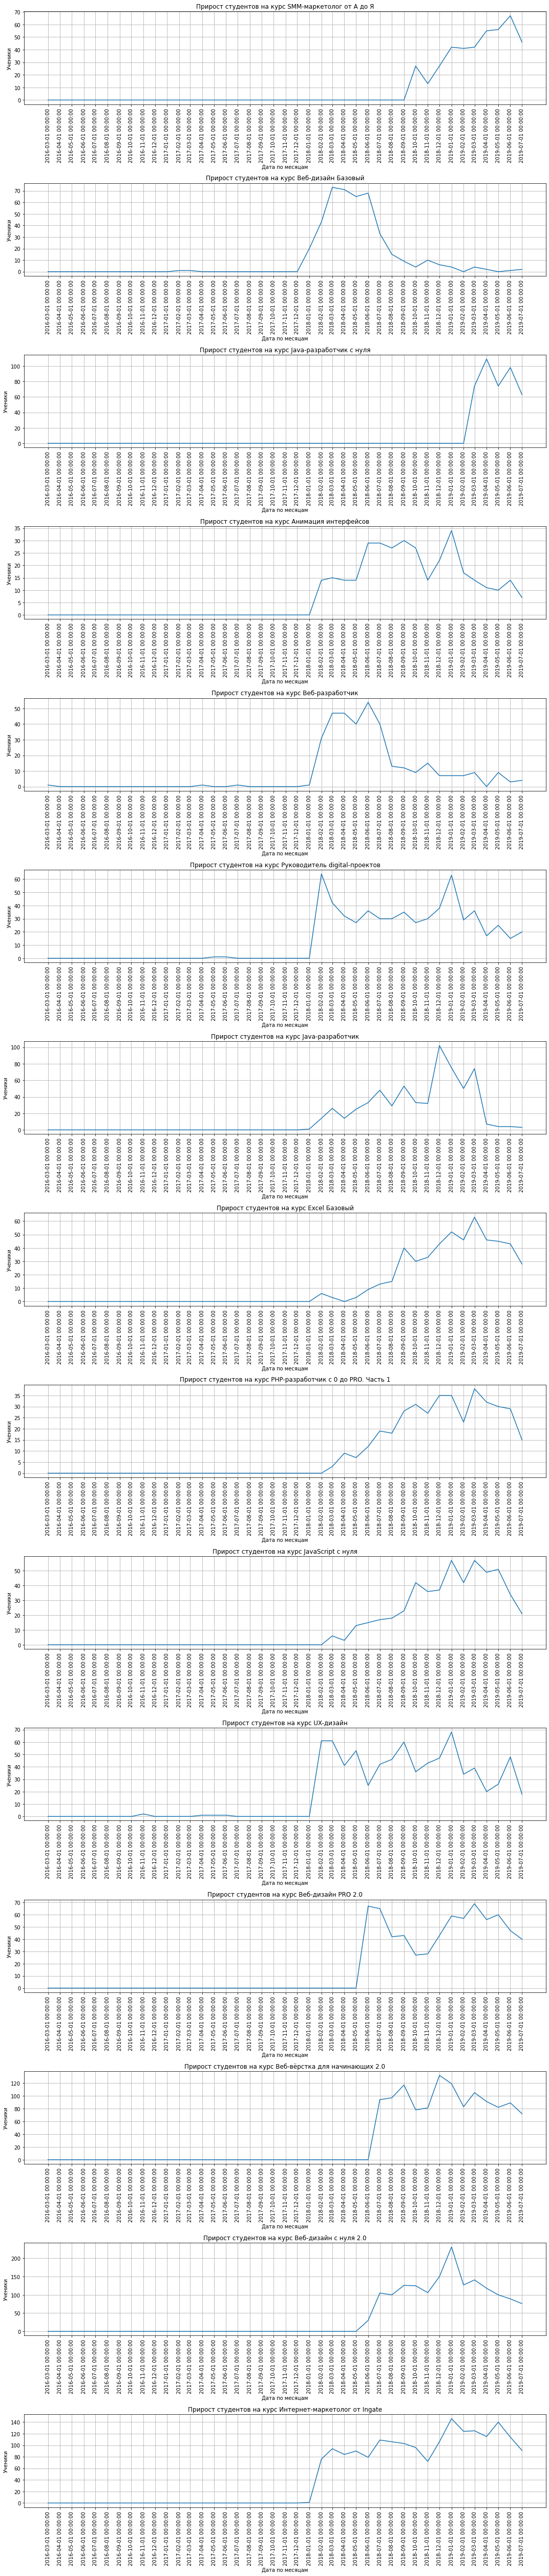

In [16]:
fig, axes = plt.subplots(15, 1, figsize=(15, 70))
m = stud.index.unique()
for course in range(len(courses_list)):
    axes[course].plot(m, stud[stud['course_title'] == courses_list[course]][0])
    plt.xticks(rotation=45)
    axes[course].set_xticks(m)
    axes[course].set_xticklabels(m, rotation=90)
    axes[course].set_xlabel('Дата по месяцам')
    axes[course].set_ylabel('Ученики')
    axes[course].set_title('Прирост студентов на курс {}'.format(
        courses_list[course]))
    axes[course].grid()

plt.tight_layout()
plt.show()

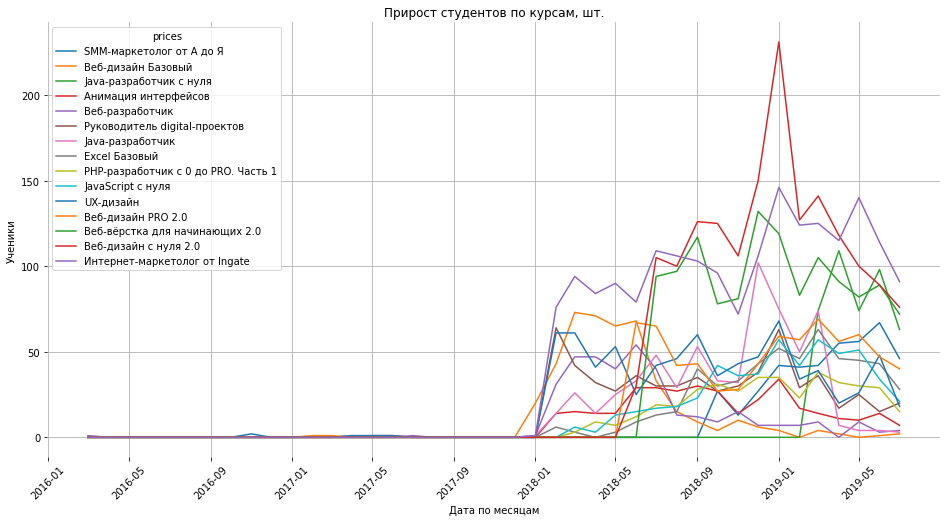

In [17]:
plt.figure(figsize=(16, 8))

for course in courses_list:
    plt.plot(m, stud[stud['course_title'] == course][0], label=course)
    plt.xticks(rotation=45)

plt.xlabel('Дата по месяцам')
plt.ylabel('Ученики')
plt.title('Прирост студентов по курсам, шт.')
plt.grid()
plt.legend(loc='upper left', title='prices')
sns.despine(left=True, bottom=True, right=True)

Первое, что можно отметить, исходя из прироста учеников - в большей части курсов значительный прирост начался в конце 2017 года, при этом на некоторых курсах ("Веб-разработчик", "Веб-дизайн базовый", "UX-дизайн") первый взлет был одним из самых значимых.

На специальность "Руководитель digital-проектов" после значительного роста до ~60 учеников был большой упадок до 30-40 учеников в месяц. Однако в конце 2018 рост возобновился.

Прирост учеников на курс "UX-дизайн" идет волнами до конца рассматриваемого периода, с пиками через каждые полгода, верхние значения доходили до 60-70 учеников в месяц, нижние показатели прироста были ~30.

Курс "Веб-дизайн базовый" после первого скачка имел стабильный прирост 60-70 учеников в месяц первые полгода 2018, однако затем последовал упадок прироста и был на уровне ~15 учеников в месяц.

"Веб-разработчик" так же имел весьма высокие значения прироста лишь в первой половине 2018 года, затем упал до значений 5-15 учеников.

Курс "Интернет-маркетолог от Ingate" имел прирост 70-110 учеников вплоть до октября 2018, затем последовал скачок до >130, в марте последовал спад до ~80.

"Java-разработчик" имеет заметно отличающуюся от других статистику. Изначально, пользуясь маленьким спросом, в октябре 2018 года курс получил значимый прирост до 100 учеников в месяц, но уже через 2 месяца ежемесячно приходило только 40 учеников, а затем и менее 10 в месяц.

"Веб-вёрстка для начинающих 2.0", судя по данным, был добавлен в феврале 2018 года и сразу же получил неплохую популярность, вероятно, потому что, является второй версией курса. Можно отметить малое количество перепадов значений относительно других курсов: прирост на данный курс изначально был на уровне 100 учеников и держался впоследствии на уровне 80-120 учеников в месяц.

"Java-script с нуля" изначально имел низкий прирост учеников, однако постепенно пришел к отметке ~25 в июне 2018, затем последовал рост до марта 2019 года. После этого прирост уменьшался до показателей ~20 и ниже.

"Веб-дизайн PRO 2.0" - на этот курс ученики стали приходить в апреле 2018, прирост поднялся до показателя 65 учеников в месяц, после чего начал снижаться до сентября 2018 года, когда составил 25 учеников в месяц. Показатели прироста вернулись в промежуток 55-70 учеников до марта 2019, после чего последовало снижение прироста.

"Анимация интерфейсов" с декабря до марта 2018 года имел прирост <15 учеников в месяц, затем последовал рост до 25-30, однако уже в сентябре вернулся на прежний уровень. Ближе к концу года последовал рост, а в начале года прирост начал падать, и стал менее 10 учеников в месяц.

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Курс "Excel Базовый" был относительно непопулярен вплоть до июня 2018 года, однако затем прирост поднялся до отметки 40, после чего произошел небольшой спад, с последуюшим ростом вплоть до пика, который выпал на январь 2019, с последующим падением.!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

"Веб-дизайн с нуля 2.0" - в июне курс начали 30 учеников, однако уже в июле прирост был более 105 учеников, затем колебался в диапазоне 100-126. В декабре прирост составил 150 студентов, а в январе поднялся до 231, с последующим спадом до 127.

"PHP-разработчик с нуля до PRO" имел значительный прирост с января до ноября 2018 года до отметки 35 учеников в месяц. Серьезный спад произошел в декабре 2018 - до 20 учеников, однако в январе прирост вернулся на отметку выше 35. Затем произошел постепенный спад, закончившийся падением до значения 20 в мае 2019 года.

"Java-разработчик с нуля" - самый новый курс, который открылся в январе 2019 и сразу имел прирост более 70 учеников в месяц. Достиг отметки 109 студентов, и затем опустился до 74, опять возрос до 98, а в мае опустился до 63.

"SMM-маркетолог от А до Я" в августе 2018 начал прирост с значения 27. Затем показатель упал до отметки 13, снова вернулся до 27, поднялся до 42. В марте снова вырос до 55, а потом и до 67, однако в мае вернулся к 46.

Подводя итоги, по приросту можно выявить некоторые закономерности, например, значительный рост показателей прироста в момент с июля по сентябрь 2018 года, по таким курсам как "PHP разработчик с нуля до PRO. Часть 1", "Веб-дизайн с нуля 2.0", "UX-дизайн", "Excel базовый", "Java-разработчик", падение с октября по ноябрь 2018 у большинства курсов, и последующий скачок, с пиком в январе 2019 и падением в феврале, и подскоком в марте. Можно предположить что скачки и падения зависят от акционных предложений (скидок), а так же от месяца, и сезона учебного года. Также можно отметить, что зачастую прирост идет "волнами".

In [18]:
prog_count = mer_main[mer_main['is_homework'] == True].copy()

# Исключаем записи с незаполненными датами
prog_count['finish_date_new'] = prog_count['finish_date_new'].fillna(
    prog_count['start_date_new'])
# Заполняем колонку интервалом между датой начала и окончания урока
prog_count['prog_interval'] = prog_count.apply(
    lambda row: pd.date_range(start=row['start_date_new'],
                              end=row['finish_date_new'],
                              freq=pd.offsets.MonthBegin()),
    axis=1)

prog_count

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,course_title,field,module_title,lesson_title,lesson_token,is_video,is_homework,start_date_new,finish_date_new,prog_interval
3555,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True,2018-06-01,2018-06-01,"DatetimeIndex(['2018-06-01'], dtype='datetime6..."
3556,3b9dce04f32da32763124602557f92a3,1,6,done,2019-03-16 15:28:29.978311+00,2019-03-18 09:51:16.562395+00,03151bc73bdb29fe1be1443c6d83e22f,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True,2019-03-01,2019-03-01,"DatetimeIndex(['2019-03-01'], dtype='datetime6..."
3557,73e17a05355852fe65b785c82c37d1ad,1,6,done,2019-07-02 19:01:15.282595+00,2019-07-03 18:10:52.187797+00,ed235f47e16da6e83d3f1cb511f38ea6,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True,2019-07-01,2019-07-01,"DatetimeIndex(['2019-07-01'], dtype='datetime6..."
3558,cc3eb34ae49c719648352c4175daee88,1,6,done,2018-07-25 09:39:56.674653+00,2018-07-27 15:39:17.61395+00,59e8681cb7b5c8043ae1aac10c8053ca,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True,2018-07-01,2018-07-01,"DatetimeIndex(['2018-07-01'], dtype='datetime6..."
3559,04ace4fe130d90c801e24eea13ee808e,1,6,done,2019-04-24 18:11:57.82383+00,2019-04-25 10:11:25.756062+00,c16250079190337fe9074736e33eecb2,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True,2019-04-01,2019-04-01,"DatetimeIndex(['2019-04-01'], dtype='datetime6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350669,132afd9b9dbe68dabbfa4d2c3d1ddb3a,9,14,start,2019-07-15 00:35:45.64027+00,NaN,03802954ea7d0a7de28272a8b3986ebe,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,Работа с файлами и сетью,Домашняя работа,014b119e-7d3e-47dc-bf02-ef10e8366e81,False,True,2019-07-01,2019-07-01,"DatetimeIndex(['2019-07-01'], dtype='datetime6..."
350670,f6216204f2c65eea37f913cfa5e4eb6a,9,14,done,2019-07-01 20:06:56.697121+00,2019-07-06 04:47:43.213367+00,c21fa1f7fa61d11253e4cc8eeeb03027,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,Работа с файлами и сетью,Домашняя работа,014b119e-7d3e-47dc-bf02-ef10e8366e81,False,True,2019-07-01,2019-07-01,"DatetimeIndex(['2019-07-01'], dtype='datetime6..."
350671,45289b36f4827d49d9d3757fc9486ca0,9,14,done,2019-07-01 14:35:47.629736+00,2019-07-12 03:36:51.775851+00,4e5f1ba884ba5759c07cf6e942ae5e98,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,Работа с файлами и сетью,Домашняя работа,014b119e-7d3e-47dc-bf02-ef10e8366e81,False,True,2019-07-01,2019-07-01,"DatetimeIndex(['2019-07-01'], dtype='datetime6..."
350672,7c46c781a54bf9d17f24b4920df4f7eb,9,14,start,2019-07-03 18:46:02.766878+00,NaN,1a0acf593d0a38155bafdf29e3cba338,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,Работа с файлами и сетью,Домашняя работа,014b119e-7d3e-47dc-bf02-ef10e8366e81,False,True,2019-07-01,2019-07-01,"DatetimeIndex(['2019-07-01'], dtype='datetime6..."


In [19]:
# Расчитываем список месяцев (интервал), в которые выполнялось каждое домашнее задание
prog_count = prog_count.loc[:,
                            ['course_title', 'prog_interval', 'progress_id'
                             ]].explode('prog_interval')
prog_count = prog_count.groupby(['course_title', 'prog_interval'
                                 ])['progress_id'].count().reset_index()
prog_count.set_index('prog_interval', inplace=True)
prog_count

,course_title,progress_id
prog_interval,,
2018-02-01,Excel Базовый,37
2018-03-01,Excel Базовый,7
2018-04-01,Excel Базовый,13
2018-05-01,Excel Базовый,17
2018-06-01,Excel Базовый,37
...,...,...
2019-03-01,Руководитель digital-проектов,385
2019-04-01,Руководитель digital-проектов,284
2019-05-01,Руководитель digital-проектов,291


In [20]:
# Вызываем функцию для преобразования датафрейма
prog = reind(prog_count, courses_list, sm)

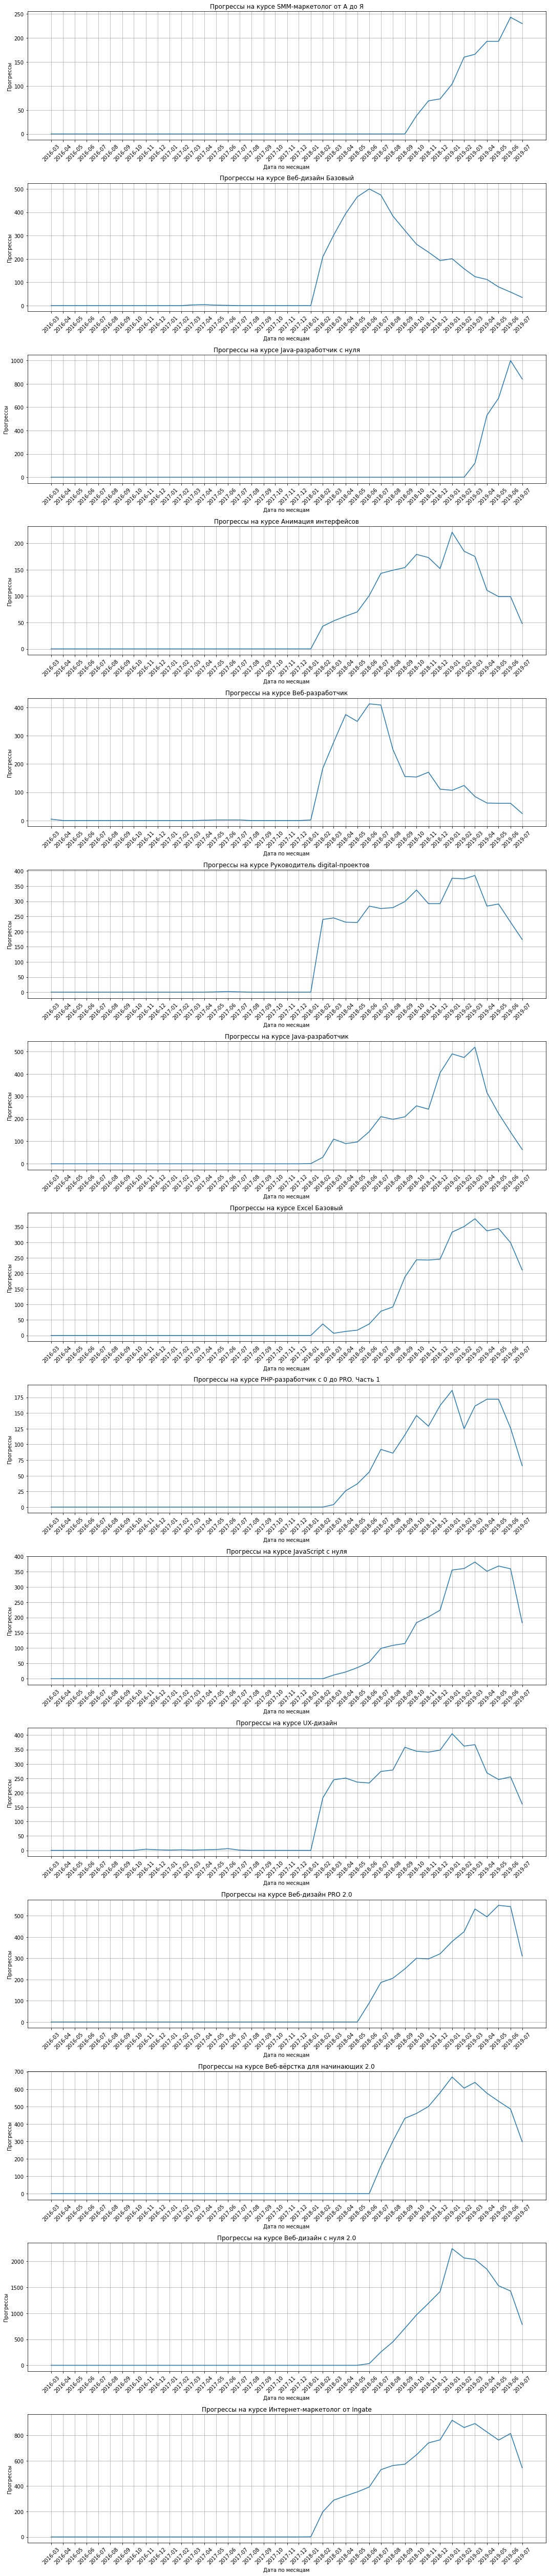

In [21]:
fig, axes = plt.subplots(15, 1, figsize=(15, 70))

for ax, course in enumerate(courses_list):
    axes[ax].plot(prog[prog['course_title'] == course].index,
                  prog[prog['course_title'] == course]['progress_id'])
    axes[ax].set_xticks(prog[prog['course_title'] == course].index)
    axes[ax].set_xticklabels(prog[prog['course_title'] == course].index,
                             rotation=45)
    axes[ax].xaxis.set_major_formatter(DateFormatter("%Y-%m"))
    axes[ax].set_xlabel('Дата по месяцам')
    axes[ax].set_ylabel('Прогрессы')
    axes[ax].set_title('Прогрессы на курсе {}'.format(course))
    axes[ax].grid()

plt.tight_layout()
plt.show()

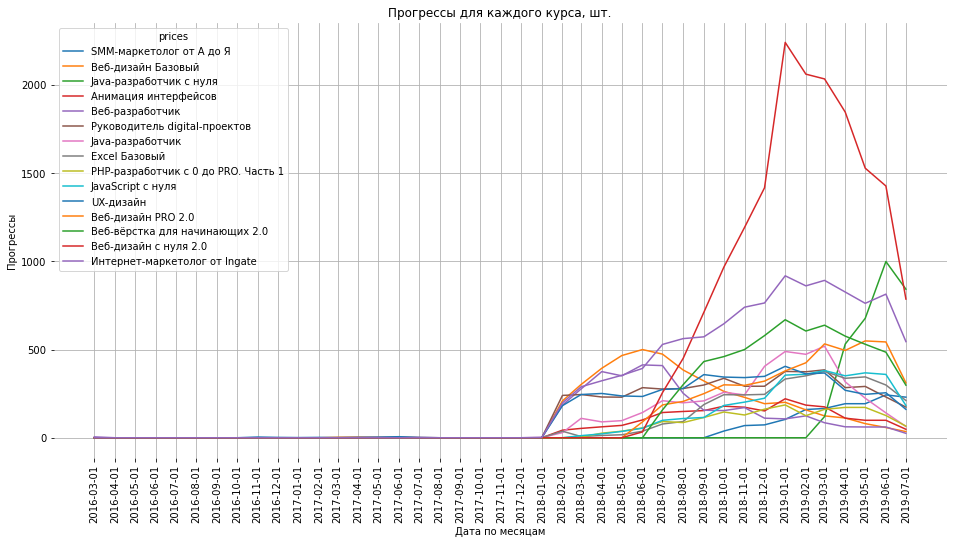

In [22]:
plt.figure(figsize=(16, 8))

for course in courses_list:
    plt.plot(prog[prog['course_title'] == course].index,
             prog[prog['course_title'] == course]['progress_id'],
             label=course)

plt.xticks(prog[prog['course_title'] == course].index, rotation=90)
plt.xlabel('Дата по месяцам')
plt.ylabel('Прогрессы')
plt.title('Прогрессы для каждого курса, шт.')
plt.grid()
plt.legend(loc='upper left', title='prices')
sns.despine(left=True, bottom=True, right=True)

Что касается прогрессов, очевидна явная зависимость их количества от прироста студентов, что вполне логично: чем больше студентов, тем больше заданий они выполняют. Однако тут стоит отметить, что прослеживаются явные скачки количества прогрессов, а это может сказаться на нагрузке на преподавателей. Преимущественно такие скачки выпадают на сентябрь, а так же просматривались в период конца 2018 - начала 2019 года, что может быть связано с началом нового учебного года, и новогодними праздниками соответственно. В июне так же замечен прирост прогрессов, что можно связать с окончанием учебного года. Так же можно заметить, что после резких скачков количества прогрессов, из-за прироста новых учеников, уже через месяц количество прогрессов значительно уменьшается. Можно связать это с падением интереса к учебе у новых студентов, либо увеличением объема и повышением сложности задач.

## 3. Выявление проблемных модулей

1. Рассчитать минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса. Если домашних заданий в модуле несколько, то считать разность между временем начала выполнения первой домашней работы и временем окончания выполнения последней домашней работы в модуле
2. На основании первого пункта построить line-graph с медианным временем прохождения каждого модуля для каждого курса. 15 графиков. Графики должны иметь заголовки
3. Чтобы выявить сезонность, посчитать медианное время выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса. 
4. На основании третьего пункта построить line-graph, на который будут нанесены линии для каждого курса с медианным временем выполнения домашней работы по месяцам. 15 линий на графике. График должен иметь заголовок. Ось, отражающая время прохождения, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно  
5. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

In [23]:
homeworks_df = mer_main.copy()
# Создаем датафрейм только с домашними работами
homeworks_df = homeworks_df[(homeworks_df['is_homework'] == True) | (
    homeworks_df['lesson_title'] == "Сохранение документов")]
# Меняем тип полей с датами
moudle_duration = homeworks_df.copy()
moudle_duration['finish_date'] = moudle_duration['finish_date'].astype(
    'datetime64[ns]')
moudle_duration['start_date'] = moudle_duration['start_date'].astype(
    'datetime64[ns]')
# Убираем незаполненные записи
moudle_duration = moudle_duration.dropna()
# Создаем таблицу со списком первых и последних дз в модуле
dur_fin = moudle_duration.groupby(
    ['course_title', 'module_number',
     'student_id'])[['finish_date', 'start_date']].agg({
         'finish_date': max,
         'start_date': min
     }).reset_index()
# Создаем колонку "длительность"
dur_fin['duration'] = dur_fin['finish_date'] - dur_fin['start_date']

# Убираем некорректные записи, находим самое быстрое прохождение модулей
dur_fin[dur_fin['duration'] > datetime.timedelta(seconds=1)].groupby(
    ['course_title',
     'module_number'])['duration'].agg(lambda x: x.min()).reset_index()

,course_title,module_number,duration
0,Excel Базовый,1,0 days 00:52:49.101080
1,Excel Базовый,2,0 days 00:53:46.720239
2,Excel Базовый,3,0 days 00:28:21.958252
3,Excel Базовый,4,0 days 01:45:43.006464
4,Excel Базовый,5,0 days 01:22:41.490445
...,...,...,...
186,Руководитель digital-проектов,12,0 days 02:10:45.464381
187,Руководитель digital-проектов,13,0 days 18:15:58.759573
188,Руководитель digital-проектов,14,0 days 20:49:06.138087
189,Руководитель digital-проектов,15,0 days 02:04:46.593517


In [24]:
# Находим максимальные значения времени, затраченного студентами на прохождение модулей
dur_fin.groupby(['course_title', 'module_number'
                 ])['duration'].agg(lambda x: x.max()).reset_index()

,course_title,module_number,duration
0,Excel Базовый,1,183 days 17:57:52.247793
1,Excel Базовый,2,184 days 06:27:48.841839
2,Excel Базовый,3,89 days 03:11:50.758958
3,Excel Базовый,4,327 days 13:09:58.465046
4,Excel Базовый,5,175 days 13:10:49.724595
...,...,...,...
186,Руководитель digital-проектов,12,211 days 13:38:10.145467
187,Руководитель digital-проектов,13,246 days 20:15:03.960003
188,Руководитель digital-проектов,14,199 days 03:15:55.467643
189,Руководитель digital-проектов,15,132 days 04:58:36.764804


In [25]:
# Находим средние показатели времени, затраченного на прохождение модулей
dur_fin.groupby(['course_title', 'module_number'
                 ])['duration'].agg(lambda x: x.mean()).reset_index()

,course_title,module_number,duration
0,Excel Базовый,1,5 days 23:47:54.195382096
1,Excel Базовый,2,4 days 07:20:42.029634647
2,Excel Базовый,3,3 days 09:55:13.662154715
3,Excel Базовый,4,10 days 21:22:39.171686788
4,Excel Базовый,5,7 days 08:15:41.042986359
...,...,...,...
186,Руководитель digital-проектов,12,21 days 06:12:48.774678375
187,Руководитель digital-проектов,13,26 days 01:18:58.103463478
188,Руководитель digital-проектов,14,14 days 15:20:12.798221172
189,Руководитель digital-проектов,15,6 days 15:00:45.428826968


In [26]:
# Находим медианные показатели времени, затраченного на прохождение модулей
dur_fin.groupby(['course_title', 'module_number'
                 ])['duration'].agg(lambda x: x.median()).reset_index()

,course_title,module_number,duration
0,Excel Базовый,1,2 days 07:24:50.049678
1,Excel Базовый,2,1 days 20:24:06.134843500
2,Excel Базовый,3,1 days 11:54:27.957196
3,Excel Базовый,4,3 days 04:58:46.128977
4,Excel Базовый,5,2 days 23:30:55.474674500
...,...,...,...
186,Руководитель digital-проектов,12,7 days 00:41:40.763640
187,Руководитель digital-проектов,13,11 days 10:54:30.868306
188,Руководитель digital-проектов,14,7 days 18:42:35.495710500
189,Руководитель digital-проектов,15,2 days 10:52:21.830890


In [27]:
courses_list

array(['SMM-маркетолог от А до Я', 'Веб-дизайн Базовый',
       'Java-разработчик c нуля', 'Анимация интерфейсов',
       'Веб-разработчик', 'Руководитель digital-проектов',
       'Java-разработчик', 'Excel Базовый',
       'PHP-разработчик с 0 до PRO. Часть 1', 'JavaScript с нуля',
       'UX-дизайн', 'Веб-дизайн PRO 2.0',
       'Веб-вёрстка для начинающих 2.0', 'Веб-дизайн с нуля 2.0',
       'Интернет-маркетолог от Ingate'], dtype=object)

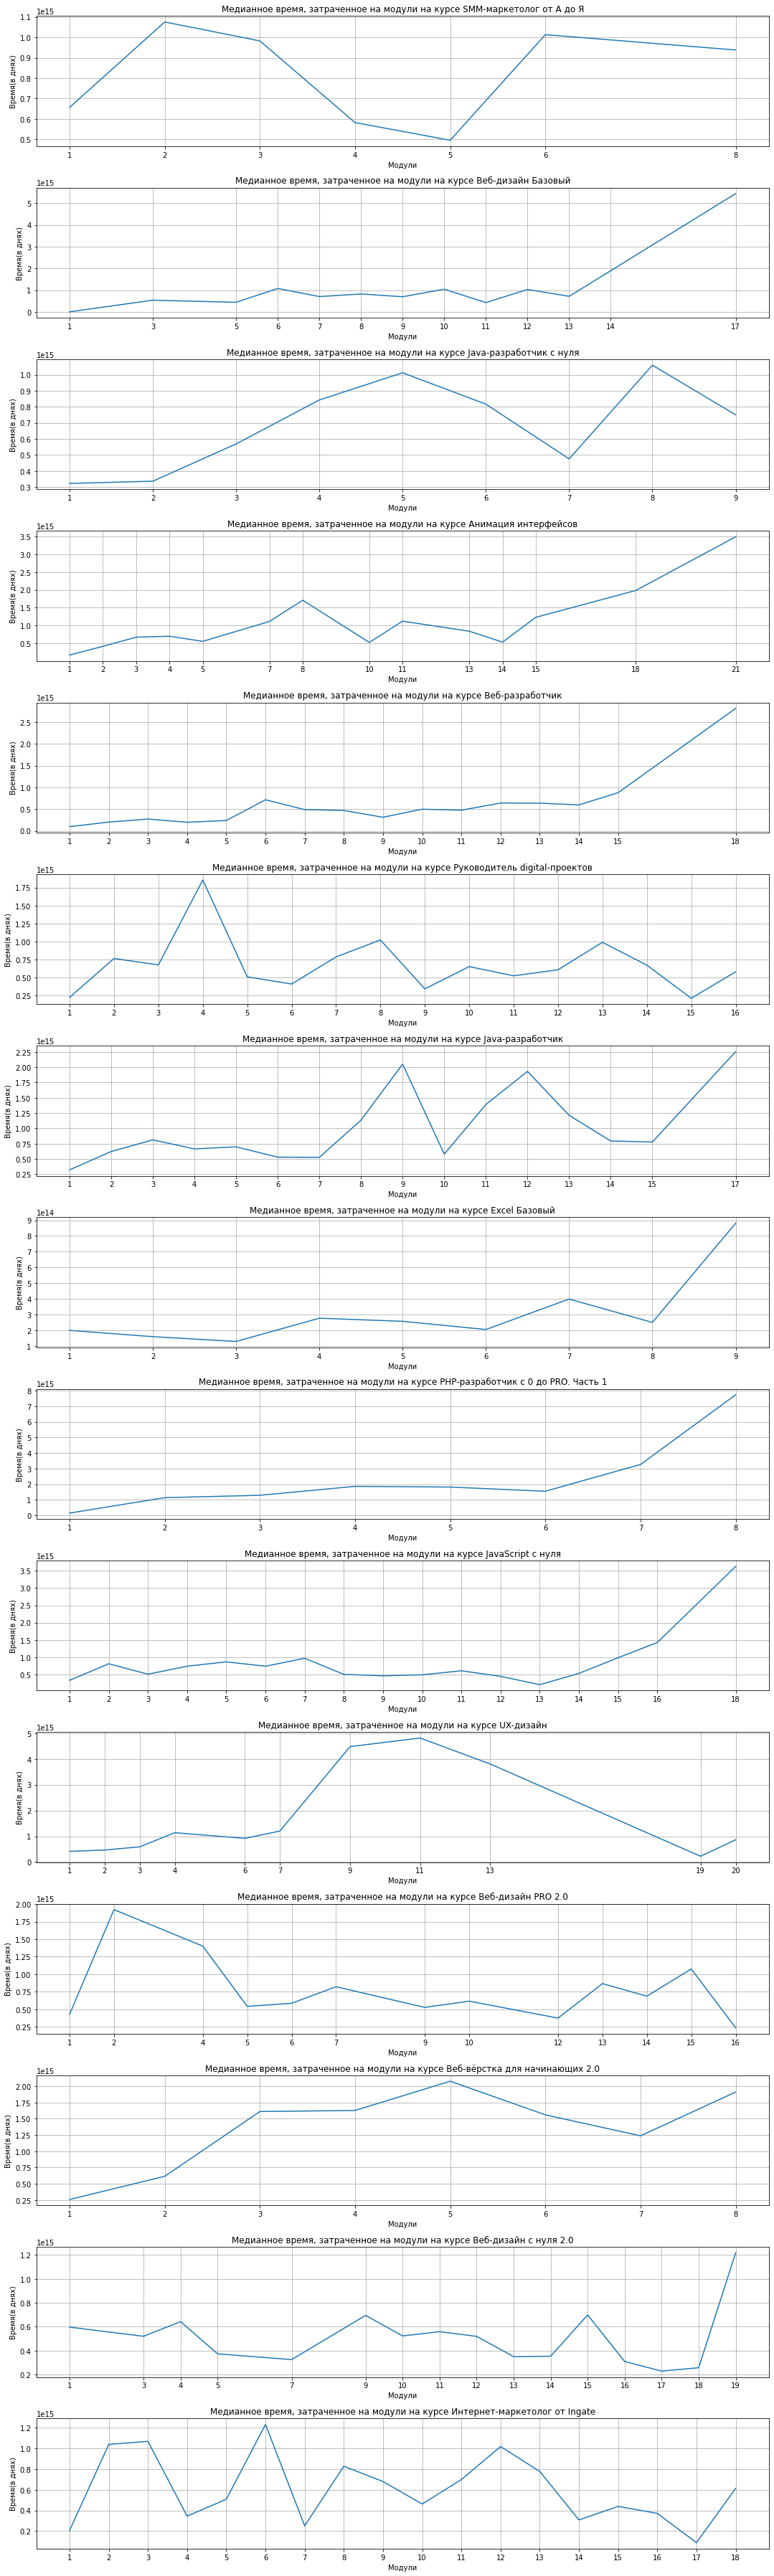

In [28]:
fig, axes = plt.subplots(15, 1, figsize=(15, 50))

for ax, course in enumerate(courses_list):
    axes[ax].plot(
        dur_fin[dur_fin['course_title'] == course]['module_number'].unique(),
        dur_fin[dur_fin['course_title'] == course].groupby(
            ['module_number'])['duration'].agg(lambda x: x.median()),
    )
    axes[ax].set_xticks(
        dur_fin[dur_fin['course_title'] == course]['module_number'].unique())
    axes[ax].set_xlabel('Модули')
    axes[ax].set_ylabel('Время(в днях)')
    axes[ax].set_title(
        'Медианное время, затраченное на модули на курсе {}'.format(course))
    axes[ax].grid()

plt.tight_layout()

Продолжительность выполнения курсов и модулей

Что касается минимального и максимального времени прохождения модулей, можно отметить то, что разброс очень большой, начиная от нескольких десятков минут, и заканчивая сотнями дней. Из этого можно сделать вывод, что некоторые ученики надолго "забрасывают" модули. То же можно сказать про отличие медианных значений от средних, их значения могут отличаться в три, а то и более раза, что, опять таки, говорит о том, что есть значительное количество студентов, которые долго выполняют задания.

Если посмотреть на графики медианного времени завершения модулей по курсам, то можно выявить "проблемные" модули, на которые у большинства студентов уходит больше времени, чем на остальные.

На курсе "Java-разработчик" такими модулями являются модули под номерами 9, 12, 17. Модуль 17 является последним модулем на курсе, поэтому неудивительно что на него уходит много времени. Модули 9 и 12, возможно, более объемные, чем остальные, либо же вызывают трудности у большинства студентов.

Что касается курса "Веб-разработчик", на последний, 18 модуль, у большинства в среднем уходит более 2.5 дней, тогда как на остальные модули уходит не более дня, а в основном даже меньше половины суток.

На курсе "Веб-дизайн Базовый", в целом, распределение времени на модули идет без резких выбросов. Явно видно тенденцию относительно последнего модуля, - на него в среднем тратят значительно больше времени.

В курсе "UX-дизайн" большинство учеников тратит много времени на прохождение модулей с 8 по 13, предположительно, в силу своего объема, а так же, вероятно, из-за необходимости наличия более высокого уровня знаний, чем для первых вводных блоков.

В курсе "Java-script с нуля" для большинства стало труднее всего завершить модули с 15 по 18, что может говорить о том, что последние модули курса даются ученикам сложнее всего.

В процессе прохождения курса "Веб-дизайн PRO 2.0" самыми проблемными для большинства модулями оказались модули под номерами 2 и 4.

В курсе "Анимация интерфейсов" из проблемных можно выделить 8 модуль, а так же последние 3 модуля в курсе.

В курсе "Руководитель digital-проектов" явно выделяется модуль под номером 4. Вероятно, данный модуль является проблемным и необходимо разобраться, почему у многих возникают проблемы с его прохождением.

Что касается курса "Интернет-маркетолог от Ingate", время, затраченное на прохождение модулей, в данном курсе разнится. Модули 2, 3, 6, 17 в среднем занимали больше времени, чем остальные. Это может быть связано как с разным объемом работы в каждом из модулей, так и с тем, что перечисленные модули вызывают трудности из-за плохой подачи материала, либо повышенной сложностью для большинства учеников.

У курса "Excel Базовый" заметно выбивается последний, 9 модуль (в среднем для большинства 9 дней), тогда как все предыдущие модули выполнялись за 3-4 дня.

В курсе "Веб-дизайн с нуля 2.0" также, как и у многих других курсов, самым "долгим" стал последний модуль курса. Других значимых отклонений нет.

То же самое можно сказать и про курс "PHP-разработчик с 0 до PRO. Часть 1"

График у курса "Java-разработчик с нуля" имеет интересное распределение, т.к. с 1 до 5 модуля значение растет, затем идет вниз, вплоть до 7. На модуль №8 в среднем тратили больше всего времени, тогда как последний (9) модуль, большинство сделало быстрее, что выбивается из общей тенденции среди курсов.

В курсе "SMM-маркетолог от А до Я" проблемными можно считать модули 2 и 6, так как на их выполнение студенты тратили больше времени, чем даже на финальный модуль. Также видно что модули под номерами 4 и 5 были выполнены намного быстрее остальных.

In [29]:
# Определяем номер месяца для сезонности, записываем в новый столбец
dur_fin['month'] = dur_fin['finish_date'].agg(lambda x: x.month)

In [30]:
# Находим медианные значения по месяцам
dur_fin = dur_fin.groupby(
    ['course_title',
     'month'])['duration'].agg(lambda x: x.median()).reset_index()

dur_fin

,course_title,month,duration
0,Excel Базовый,1,2 days 02:23:19.408905
1,Excel Базовый,2,2 days 05:46:39.750756
2,Excel Базовый,3,2 days 19:52:58.386801
3,Excel Базовый,4,1 days 21:12:39.180702
4,Excel Базовый,5,2 days 13:55:33.682246
...,...,...,...
166,Руководитель digital-проектов,8,12 days 17:57:06.266040
167,Руководитель digital-проектов,9,10 days 06:33:01.797343500
168,Руководитель digital-проектов,10,5 days 21:55:02.288355
169,Руководитель digital-проектов,11,5 days 18:27:20.997123


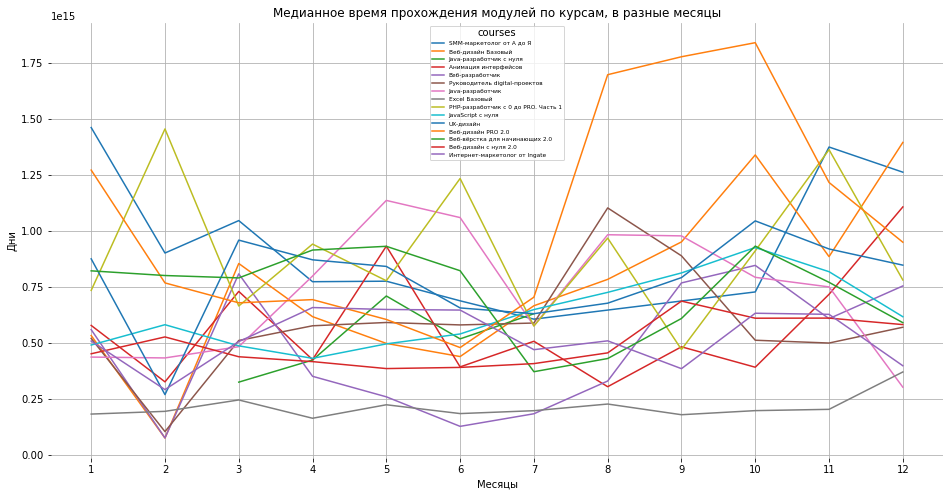

In [31]:
plt.figure(figsize=(16, 8))
for course in courses_list:
    plt.plot(dur_fin[dur_fin['course_title'] == course]['month'],
             dur_fin[dur_fin['course_title'] == course]['duration'],
             label=course)

plt.xticks(dur_fin['month'].unique())
plt.xlabel('Месяцы')
plt.ylabel('Дни')
plt.title('Медианное время прохождения модулей по курсам, в разные месяцы')
plt.grid()
plt.legend(loc='upper center', title='courses', fontsize='xx-small')
sns.despine(left=True, bottom=True, right=True)

Что касается сезонности, можно отметить следующие тренды у большинства курсов:

В феврале, июне и июле в среднем на модуль тратили меньше всего времени, тогда как в марте, августе, октябре показатель затраченного времени растет. Это также можно связать с тем, что основной прирост учеников выпадает на конец года, конец учебного года, начало учебного года, и, как было сказано выше, связано с увеличением объема модулей в курсах, с продвижением прогресса ученика, либо же с падением интереса к учебе.

Однако, можно выделить курс "PHP-разработчик с 0 до PRO.Часть 1", который не особо подвержен трендам, и идет волнами с пиками через каждые 2 месяца. Это может быть вызвано небольшой продолжительностью курса, в котором именно последние модули занимают наибольшее количество времени, то есть, когда волна новых студентов доходит до последних модулей, медианное значение затраченного времени на модуль у данного курса начинает расти.

В заключении данной части можно сделать вывод, что в каждом курсе есть свои особенности и выделяются некоторые, вероятно, проблемные модули. В некоторых же курсах заметно неравномерное распределение затраченного на модули времени, что может быть связано с разным объемом работы в каждом из них. Последний модуль в курсе зачастую является самым проблемным для большинства, однако это вполне закономерно.

Из графика сезонности мы нашли конкретные месяцы, когда нагрузка на преподавателей значительно возрастает. Исходя из этой информации можно порекомендовать увеличить количество работающих преподавателей в это время.

## 4. Расчет конверсии

1. Посчитать конверсию перехода студентов из одного модуля в другой на каждом курсе. Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле (если дз в модуле несколько, то считать по первому дз в модуле), к количеству студентов, сдавших задание в предыдущем модуле (если дз в модуле несколько, то считать по последнему дз в модуле).
2. Постройте bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. График должен иметь заголовок. Ticks нужно развернуть так, чтобы они были читаемы
3. Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. 15 графиков. Графики должны иметь заголовки. Ticks должны содержать номер и название модуля. Цвет столбцов графиков должен содержать информацию о сфере, к которой относится курс (нужна легенда). Прозрачность должна стоять на отметке 0.1. На графики должна быть нанесена линия медианы конверсии для каждого курса. У медианы должен быть свой цвет. Рамок у графиков быть не должно 
4. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

In [32]:
# Создаем новый dataframe, помещаем в него записи с последним дз в каждом модуле со статусом "выполнено", считаем количество студентов

convers_modules_f = homeworks_df.copy()

convers_modules_f = convers_modules_f[
    convers_modules_f['status'] == 'done'].groupby([
        'field', 'course_title', 'module_number', 'student_id', 'module_title'
    ],
                                                   as_index=False).agg({
                                                       'lesson_number':
                                                       'max',
                                                       'finish_date':
                                                       'max'
                                                   })

convers_modules_f = convers_modules_f.groupby(
    ['field', 'course_title', 'module_number', 'module_title'],
    as_index=False).agg({'student_id': 'count'})

convers_modules_f

,field,course_title,module_number,module_title,student_id
0,Business,Excel Базовый,1,Основной функционал Excel,458
1,Business,Excel Базовый,2,Основной функционал Excel (продолжение),406
2,Business,Excel Базовый,3,Формулы и функции Excel. Введение,387
3,Business,Excel Базовый,4,Формулы и функции Excel. Продолжаем работать с...,303
4,Business,Excel Базовый,5,Формулы и функции Excel. Более сложные формулы,270
...,...,...,...,...,...
186,Marketing,Интернет-маркетолог от Ingate,14,Юзабилити: разработка эффективного сайта,92
187,Marketing,Интернет-маркетолог от Ingate,15,Построение маркетинговой структуры и работа с ...,76
188,Marketing,Интернет-маркетолог от Ingate,16,Email-маркетинг,70
189,Marketing,Интернет-маркетолог от Ingate,17,Юридическая сторона рекламы,61


In [33]:
# Создаем новый dataframe, помещаем в него записи с первым дз в каждом модуле, считаем количество студентов
convers_modules_s = homeworks_df.copy()

convers_modules_s = convers_modules_s.groupby(
    ['field', 'course_title', 'module_number', 'student_id', 'module_title'],
    as_index=False)['start_date'].agg(min)

convers_modules_s = convers_modules_s.groupby(
    ['field', 'course_title', 'module_number', 'module_title'],
    as_index=False).agg({'student_id': 'count'})

convers_modules_s

,field,course_title,module_number,module_title,student_id
0,Business,Excel Базовый,1,Основной функционал Excel,518
1,Business,Excel Базовый,2,Основной функционал Excel (продолжение),434
2,Business,Excel Базовый,3,Формулы и функции Excel. Введение,398
3,Business,Excel Базовый,4,Формулы и функции Excel. Продолжаем работать с...,345
4,Business,Excel Базовый,5,Формулы и функции Excel. Более сложные формулы,298
...,...,...,...,...,...
187,Marketing,Интернет-маркетолог от Ingate,14,Юзабилити: разработка эффективного сайта,102
188,Marketing,Интернет-маркетолог от Ingate,15,Построение маркетинговой структуры и работа с ...,89
189,Marketing,Интернет-маркетолог от Ingate,16,Email-маркетинг,77
190,Marketing,Интернет-маркетолог от Ingate,17,Юридическая сторона рекламы,69


In [34]:
# Соединем полученные две таблицы левым соединением, заполняем пробелы нулями
convers_modules_final = pd.merge(
    convers_modules_s,
    convers_modules_f,
    on=['course_title', 'module_number', 'module_title', 'field'],
    how='left')
convers_modules_final.fillna(0, inplace=True)
# Получаем таблицу с столбцами 'student_id', student_id_x - количество студентов, начавших делать дз в модуле
# student_id_y - количество студентов, закончивших последнее дз в модуле
convers_modules_final

,field,course_title,module_number,module_title,student_id_x,student_id_y
0,Business,Excel Базовый,1,Основной функционал Excel,518,458.0
1,Business,Excel Базовый,2,Основной функционал Excel (продолжение),434,406.0
2,Business,Excel Базовый,3,Формулы и функции Excel. Введение,398,387.0
3,Business,Excel Базовый,4,Формулы и функции Excel. Продолжаем работать с...,345,303.0
4,Business,Excel Базовый,5,Формулы и функции Excel. Более сложные формулы,298,270.0
...,...,...,...,...,...,...
187,Marketing,Интернет-маркетолог от Ingate,14,Юзабилити: разработка эффективного сайта,102,92.0
188,Marketing,Интернет-маркетолог от Ingate,15,Построение маркетинговой структуры и работа с ...,89,76.0
189,Marketing,Интернет-маркетолог от Ingate,16,Email-маркетинг,77,70.0
190,Marketing,Интернет-маркетолог от Ingate,17,Юридическая сторона рекламы,69,61.0


In [35]:
# Заполняем новый столбец "conv", сдвинутым на 1 запись значением student_id_y
convers_modules_final.loc[
    1:191,
    'conv'] = convers_modules_final.loc[0:190].copy()['student_id_y'].values
# Меняем значение столбца "conv" для первого модуля каждого курса
convers_modules_final.loc[convers_modules_final['module_number'] == 1,
                          'conv'] = convers_modules_final['student_id_x']

# Заполняем столбец 'conv_%' процентом конверсии
convers_modules_final['conv_%'] = convers_modules_final['student_id_x'] / \
    convers_modules_final['conv']*100

# convers_modules_final[convers_modules_final['course_title'] =='SMM-маркетолог от А до Я']
convers_modules_final

,field,course_title,module_number,module_title,student_id_x,student_id_y,conv,conv_%
0,Business,Excel Базовый,1,Основной функционал Excel,518,458.0,518.0,100.000000
1,Business,Excel Базовый,2,Основной функционал Excel (продолжение),434,406.0,458.0,94.759825
2,Business,Excel Базовый,3,Формулы и функции Excel. Введение,398,387.0,406.0,98.029557
3,Business,Excel Базовый,4,Формулы и функции Excel. Продолжаем работать с...,345,303.0,387.0,89.147287
4,Business,Excel Базовый,5,Формулы и функции Excel. Более сложные формулы,298,270.0,303.0,98.349835
...,...,...,...,...,...,...,...,...
187,Marketing,Интернет-маркетолог от Ingate,14,Юзабилити: разработка эффективного сайта,102,92.0,92.0,110.869565
188,Marketing,Интернет-маркетолог от Ingate,15,Построение маркетинговой структуры и работа с ...,89,76.0,92.0,96.739130
189,Marketing,Интернет-маркетолог от Ingate,16,Email-маркетинг,77,70.0,76.0,101.315789
190,Marketing,Интернет-маркетолог от Ingate,17,Юридическая сторона рекламы,69,61.0,70.0,98.571429


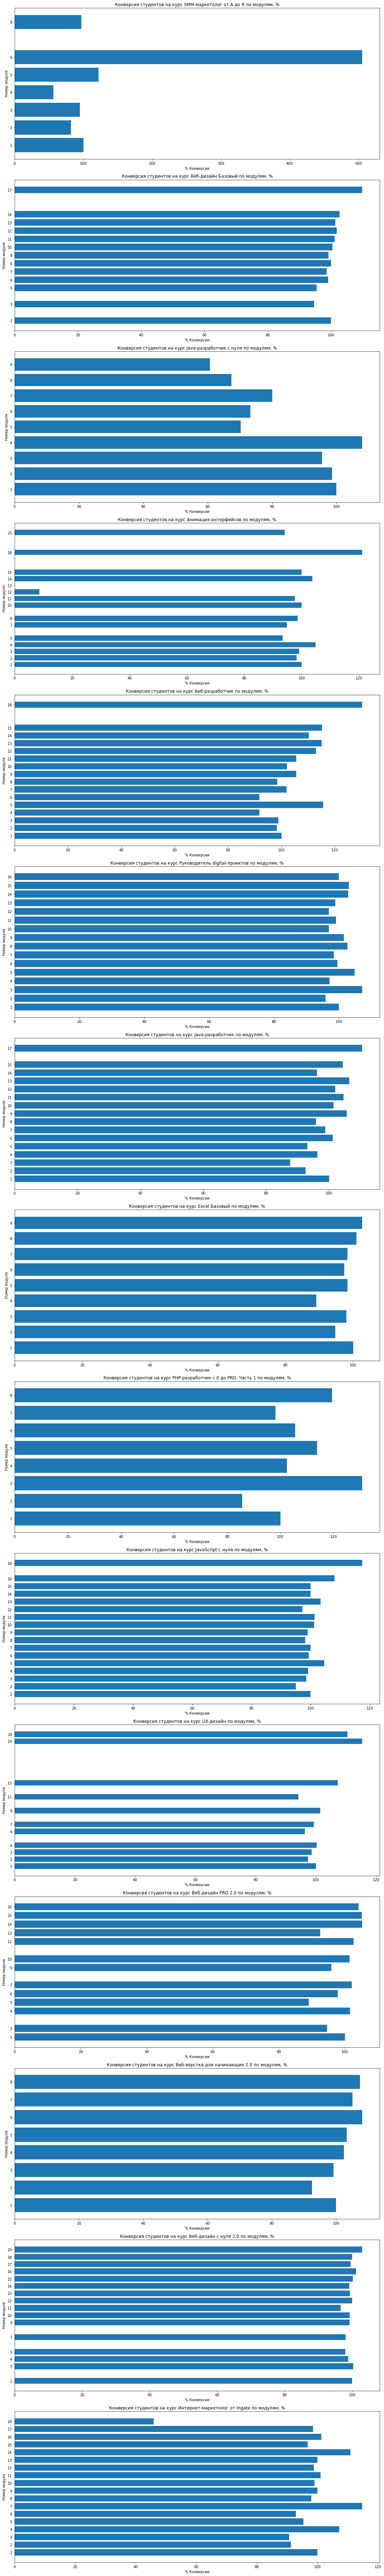

In [36]:
fig, axes = plt.subplots(15, 1, figsize=(15, 100))

for ax, course in enumerate(courses_list):
    axes[ax].barh(
        convers_modules_final[convers_modules_final['course_title'] == course]
        ['module_number'], convers_modules_final[
            convers_modules_final['course_title'] == course]['conv_%'])

    axes[ax].set_yticks(convers_modules_final[
        convers_modules_final['course_title'] == course]['module_number'])
    axes[ax].set_xlabel('% Конверсии')
    axes[ax].set_ylabel('Номер модуля')
    axes[ax].set_title(
        'Конверсия студентов на курс {} по модулям, %'.format(course))

plt.tight_layout()

In [37]:
# Функция, сокращающая имена модулей до 5 слов, для более корректного вывода графиков
def join_str(x):
    return ' '.join(x.split(' ')[:5])

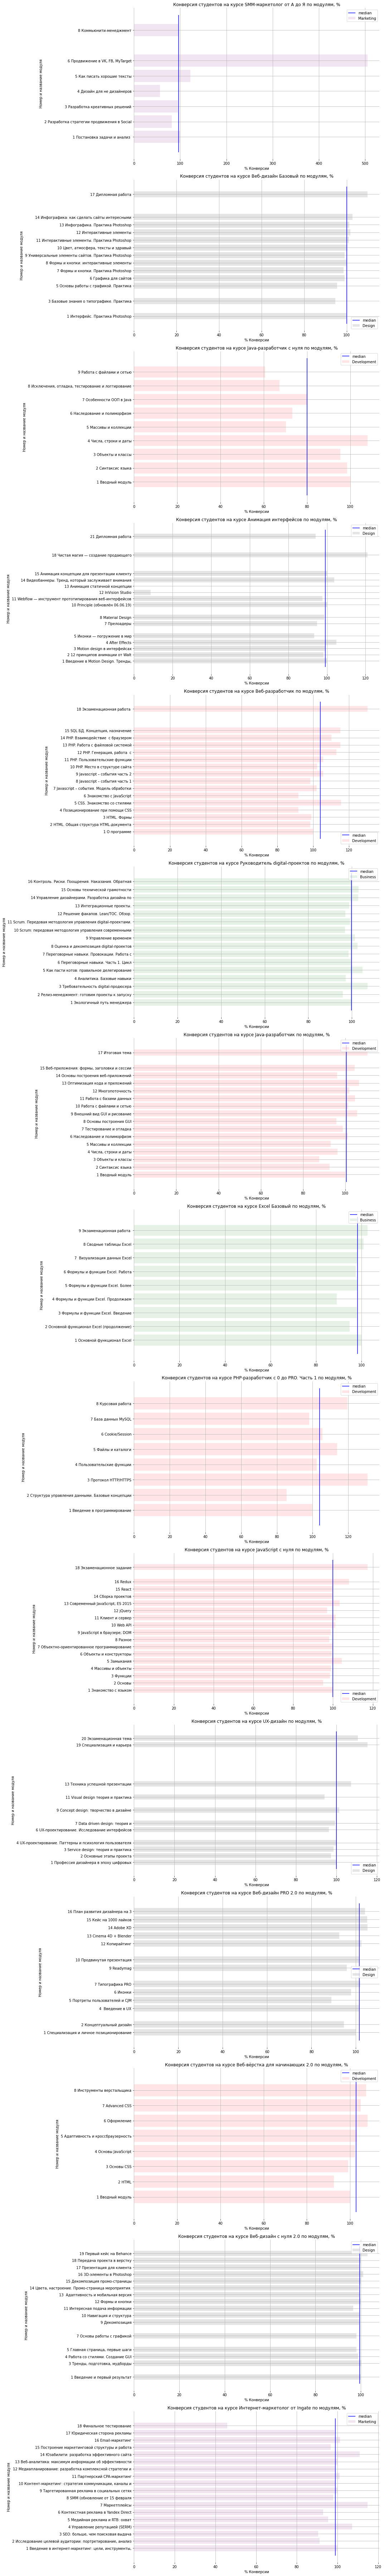

In [38]:
fig, axes = plt.subplots(15, 1, figsize=(15, 100))

convers_modules_final[
    'Module_tittle_N'] = convers_modules_final['module_number'].astype(
        str) + ' ' + convers_modules_final['module_title'].apply(join_str)
for ax, course in enumerate(courses_list):
    coursec = convers_modules_final[convers_modules_final['course_title'] ==
                                    course]
    if coursec['field'].unique()[0] == 'Business':
        axes[ax].barh(coursec['module_number'],
                      coursec['conv_%'],
                      alpha=0.1,
                      color='g',
                      label='Business')
    elif coursec['field'].unique()[0] == 'Design':
        axes[ax].barh(coursec['module_number'],
                      coursec['conv_%'],
                      alpha=0.1,
                      color='black',
                      label='Design')
    elif coursec['field'].unique()[0] == 'Development':
        axes[ax].barh(coursec['module_number'],
                      coursec['conv_%'],
                      alpha=0.1,
                      color='red',
                      label='Development')
    else:
        axes[ax].barh(coursec['module_number'],
                      coursec['conv_%'],
                      alpha=0.1,
                      color='purple',
                      label='Marketing')
    axes[ax].vlines(x=coursec['conv_%'].median(),
                    ymin=coursec['module_number'].min() - 1,
                    ymax=coursec['module_number'].max() + 1,
                    color='blue',
                    label='median')
    axes[ax].set_yticks(convers_modules_final[
        convers_modules_final['course_title'] == course]['module_number'])
    axes[ax].set_yticklabels(labels=convers_modules_final[
        convers_modules_final['course_title'] == course]['Module_tittle_N'])
    axes[ax].set_xlabel('% Конверсии')
    axes[ax].set_ylabel('Номер и название модуля')
    axes[ax].set_title(
        'Конверсия студентов на курсе {} по модулям, %'.format(course))
    axes[ax].legend()
    axes[ax].grid()
sns.despine(left=True, bottom=True, right=True)
plt.tight_layout()
plt.show()


Начнем с курса "Java-разработчик", здесь самый маленький процент конверсии выпал на модули 2-3, в остальных же модулях значение конверсии весьма незначительно отличалось от медианного по данному курсу.

В курсе "Веб-разработчик" первые 8 модулей (кроме 5) имели конверсию меньше медианной, однако затем конверсия учеников стала выше 100%. Это может означать то, что "базовые" модули (кроме css) были не настолько интересны студентам, как php, js, css.

В курсе "Веб-вёрстка для начинающих 2.0" можно отметить модуль "HTML" (2), который отличился маленьким процентом конверсии. Может быть, стоит пересмотреть материал, подаваемый в этом модуле.

"Веб-дизайн Базовый" отличился 3 и 5 модулями, где процент конверсии был ниже обычного, в остальном конверсия была на высоком уровне. Однако стоит отметить, что в данном курсе есть немало модулей без домашней работы, так что показатель конверсии не везде информативен.

Что же касается курса "Ux-дизайн", самая низкая конверсия была в 11 модуль. В данном курсе у 9 модулей не было домашнего задания.

В "JavaScript с нуля" показатели конверсии довольно стабильные, кроме последнего задания, к которому был проявлен повышенный интерес.

В "Веб-дизайн PRO 2.0" самую низкую конверсию имели модули под номерами 2, 5, 13, возможно, стоит их переработать.

В курсе "Анимация интерфейсов" в модуль 12 очень низкий показатель конверсии, и никто из учеников его пока не завершил, это, возможно, связано с тем, что данный модуль появился недавно, либо же он является весьма проблемным, ведь даже приступили к его выполнению всего лишь 3 студента. Также можно отметить повышенный интерес к 18 модулю.

Что касается курса "Руководитель digital-проектов", в нем для учеников самыми проблемными оказались модули 2 и 4, и в то же время у модулей 3 и 5 этот показатель выше обычного. Это может означать, что некоторые студенты предпочли пропустить и не выполнять модули 2 и 4.

У курса "Интернет-маректолог от Ingate" самые низкие показатели конверсии были у модулей 2, 3, 6, это можно объяснить недавним обновлением всех этих модулей. Также низкий показатель конверсии у финального тестирования, скорее всего это связано с тем, что студенты, закончившие предпоследний модуль не спешат проходить финальное тестирования, а намерены сначала подготовиться к нему.

В "Excel базовый" по показателям конверсии проблемным может быть модуль №4.

"Веб-дизайн с нуля 2.0" имеет довольно стабильную высокую конверсию по всем модулям.

В курсе "PHP-разработчик с 0 до PRO. Часть 1" самыми проблемными для большинства оказались модули 2, 7. Модуль 2, возможно, пропускают те, кто уже знаком с базовыми знаниями.

Для первой половины курса "Java-разработчик c нуля" конверсия довольно высока, однако начиная с 5 модуля значительно снижается, и находится на уровне 65-80% до конца курса. Вероятно, уроки начиная с 5 модуля намного труднее воспринимаются учениками. Возможно, стоит лучше проработать вторую половину курса.

В последнем курсе "SMM-маркетолог от А до Я" самая низкая конверсия у курса 4. А вот к курсу под номером 6 студенты проявляют огромный интерес, вероятно, связанный с пользой и актуальностью информации для данного направления.